# Annual Surface Temperature Change

### Data Importing 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

### Data Preprocess

In [2]:
#importing the csv file
df = pd.read_csv('Annual_Surface_Temperature_Change.csv', index_col= False)

# Exploratory Data Analysis (EDA)
## 1. Basic information about data - EDA

In [3]:
#Basic information
df.info()
#df.dtypes
#Describe the data
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 71 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             227 non-null    int64  
 1   Country              227 non-null    object 
 2   ISO2                 226 non-null    object 
 3   ISO3                 227 non-null    object 
 4   Indicator            227 non-null    object 
 5   Unit                 227 non-null    object 
 6   Source               227 non-null    object 
 7   CTS_Code             227 non-null    object 
 8   CTS_Name             227 non-null    object 
 9   CTS_Full_Descriptor  227 non-null    object 
 10  F1961                191 non-null    float64
 11  F1962                192 non-null    float64
 12  F1963                191 non-null    float64
 13  F1964                190 non-null    float64
 14  F1965                190 non-null    float64
 15  F1966                194 non-null    flo

,ObjectId,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
count,227.000000,191.000000,192.000000,191.000000,190.000000,190.000000,194.000000,192.000000,191.000000,191.000000,...,214.000000,216.000000,216.000000,216.000000,215.000000,214.000000,216.000000,215.000000,214.000000,214.000000
mean,114.013216,0.157152,-0.018589,-0.009361,-0.084511,-0.250305,0.110010,-0.118010,-0.197230,0.154440,...,0.887421,0.917185,1.096120,1.252981,1.427991,1.269939,1.288102,1.427628,1.538565,1.317009
std,65.696573,0.405438,0.345941,0.381624,0.308949,0.265949,0.386485,0.346238,0.276508,0.302022,...,0.438641,0.329476,0.564232,0.461446,0.406105,0.393581,0.612291,0.475653,0.627076,0.518561
min,1.000000,-0.745000,-0.910000,-1.273000,-0.876000,-1.060000,-1.793000,-1.002000,-1.624000,-0.939000,...,0.007000,0.102000,-0.008000,0.170000,0.096000,0.116000,0.285000,0.062000,0.080000,-0.288000
25%,57.500000,-0.112000,-0.184500,-0.202500,-0.253500,-0.408750,-0.042500,-0.286000,-0.323000,-0.016000,...,0.574500,0.686750,0.722250,0.975250,1.141000,0.981250,0.815000,1.106000,1.140250,0.993250
50%,114.000000,0.052000,-0.084000,-0.011000,-0.094500,-0.235000,0.078000,-0.156000,-0.186000,0.197000,...,0.788500,0.906000,0.943000,1.230500,1.434000,1.261000,1.130000,1.396000,1.468000,1.287500
75%,170.500000,0.325000,0.111250,0.186000,0.109000,-0.100250,0.286000,0.018750,-0.063000,0.362000,...,1.144500,1.174750,1.354750,1.501750,1.725000,1.541250,1.762000,1.696500,1.891500,1.695500
max,230.000000,1.906000,1.057000,1.204000,1.100000,0.856000,1.421000,1.135000,0.478000,0.808000,...,2.165000,1.684000,2.711000,2.605000,2.454000,2.486000,2.781000,2.713000,3.693000,2.543000


In [4]:
#figuring out how many rows and column in the data 
df.shape


(227, 71)

## 2. Duplicate values

In [5]:
#checking for duplicate values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
222    False
223    False
224    False
225    False
226    False
Length: 227, dtype: bool

In [6]:
#Find the sum of  duplicates
df.duplicated().sum()

0

In [7]:
#droping the duplicates 
#df =df.drop_duplicates()

## Cleaning data 

In [8]:
#droping unnessary columns
df =df.drop(df[['ObjectId','ISO2','ISO3','Indicator','Unit','Source','CTS_Code','CTS_Name','CTS_Full_Descriptor']], axis =1)

In [9]:
#changing the name of the column to Years
df.rename(columns={'Country':'Years'},inplace =True)
df

,Years,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
0,Afghanistan,-0.105,-0.157,0.852,-0.743,-0.211,0.156,-0.389,-0.384,-0.539,...,0.234,1.308,0.457,1.101,1.607,1.568,1.580,0.960,0.544,1.421
1,Albania,0.627,0.330,0.068,-0.172,-0.393,0.553,-0.080,0.073,-0.023,...,1.568,1.444,1.322,1.665,1.601,1.269,2.146,1.823,1.623,1.682
2,Algeria,0.162,0.131,0.110,0.284,-0.081,0.436,0.006,-0.027,0.278,...,1.128,1.173,1.676,1.101,1.736,1.498,1.211,1.094,1.913,2.317
3,American Samoa,0.066,-0.055,0.160,-0.150,-0.582,0.166,-0.364,-0.174,0.142,...,0.646,0.883,0.554,0.394,0.924,0.820,0.574,0.924,0.815,0.653
4,"Andorra, Principality of",0.744,0.102,-0.762,0.300,-0.492,0.407,0.621,-0.013,-0.176,...,1.196,0.757,1.857,1.546,1.830,1.771,1.761,1.813,2.401,1.367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Western Sahara,0.619,0.559,0.323,0.811,-0.342,0.295,0.013,-0.351,0.377,...,1.234,1.282,1.244,1.277,1.636,2.078,0.851,1.430,2.026,1.557
223,World,0.207,0.037,0.167,-0.252,-0.225,0.201,-0.116,-0.122,-0.091,...,1.058,1.007,1.042,1.406,1.658,1.424,1.284,1.449,1.713,1.442
224,"Yemen, Rep. of",0.033,-0.006,0.164,-0.254,-0.628,0.083,-0.262,-0.256,0.263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,Zambia,0.220,-0.177,-0.397,-0.290,-0.421,0.291,-0.013,-0.124,0.248,...,0.926,0.746,0.638,1.486,1.474,0.721,0.727,1.295,1.252,1.002


In [10]:
df.Years

0                   Afghanistan
1                       Albania
2                       Algeria
3                American Samoa
4      Andorra, Principality of
                 ...           
222              Western Sahara
223                       World
224              Yemen, Rep. of
225                      Zambia
226                    Zimbabwe
Name: Years, Length: 227, dtype: object

In [11]:
#Removing everything after ',' in country column
df['Years'] = df['Years'].str.split(',').str[0]
df

,Years,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
0,Afghanistan,-0.105,-0.157,0.852,-0.743,-0.211,0.156,-0.389,-0.384,-0.539,...,0.234,1.308,0.457,1.101,1.607,1.568,1.580,0.960,0.544,1.421
1,Albania,0.627,0.330,0.068,-0.172,-0.393,0.553,-0.080,0.073,-0.023,...,1.568,1.444,1.322,1.665,1.601,1.269,2.146,1.823,1.623,1.682
2,Algeria,0.162,0.131,0.110,0.284,-0.081,0.436,0.006,-0.027,0.278,...,1.128,1.173,1.676,1.101,1.736,1.498,1.211,1.094,1.913,2.317
3,American Samoa,0.066,-0.055,0.160,-0.150,-0.582,0.166,-0.364,-0.174,0.142,...,0.646,0.883,0.554,0.394,0.924,0.820,0.574,0.924,0.815,0.653
4,Andorra,0.744,0.102,-0.762,0.300,-0.492,0.407,0.621,-0.013,-0.176,...,1.196,0.757,1.857,1.546,1.830,1.771,1.761,1.813,2.401,1.367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Western Sahara,0.619,0.559,0.323,0.811,-0.342,0.295,0.013,-0.351,0.377,...,1.234,1.282,1.244,1.277,1.636,2.078,0.851,1.430,2.026,1.557
223,World,0.207,0.037,0.167,-0.252,-0.225,0.201,-0.116,-0.122,-0.091,...,1.058,1.007,1.042,1.406,1.658,1.424,1.284,1.449,1.713,1.442
224,Yemen,0.033,-0.006,0.164,-0.254,-0.628,0.083,-0.262,-0.256,0.263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,Zambia,0.220,-0.177,-0.397,-0.290,-0.421,0.291,-0.013,-0.124,0.248,...,0.926,0.746,0.638,1.486,1.474,0.721,0.727,1.295,1.252,1.002


In [12]:
df.index

RangeIndex(start=0, stop=227, step=1)

In [13]:
#removing the index column 

#getting rid of the index column
df.set_index(pd.Index(df['Years']),inplace=True)
df


,Years,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
Years,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Afghanistan,-0.105,-0.157,0.852,-0.743,-0.211,0.156,-0.389,-0.384,-0.539,...,0.234,1.308,0.457,1.101,1.607,1.568,1.580,0.960,0.544,1.421
Albania,Albania,0.627,0.330,0.068,-0.172,-0.393,0.553,-0.080,0.073,-0.023,...,1.568,1.444,1.322,1.665,1.601,1.269,2.146,1.823,1.623,1.682
Algeria,Algeria,0.162,0.131,0.110,0.284,-0.081,0.436,0.006,-0.027,0.278,...,1.128,1.173,1.676,1.101,1.736,1.498,1.211,1.094,1.913,2.317
American Samoa,American Samoa,0.066,-0.055,0.160,-0.150,-0.582,0.166,-0.364,-0.174,0.142,...,0.646,0.883,0.554,0.394,0.924,0.820,0.574,0.924,0.815,0.653
Andorra,Andorra,0.744,0.102,-0.762,0.300,-0.492,0.407,0.621,-0.013,-0.176,...,1.196,0.757,1.857,1.546,1.830,1.771,1.761,1.813,2.401,1.367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,Western Sahara,0.619,0.559,0.323,0.811,-0.342,0.295,0.013,-0.351,0.377,...,1.234,1.282,1.244,1.277,1.636,2.078,0.851,1.430,2.026,1.557
World,World,0.207,0.037,0.167,-0.252,-0.225,0.201,-0.116,-0.122,-0.091,...,1.058,1.007,1.042,1.406,1.658,1.424,1.284,1.449,1.713,1.442
Yemen,Yemen,0.033,-0.006,0.164,-0.254,-0.628,0.083,-0.262,-0.256,0.263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#not using the first column 
df=df.iloc[:,1:]

#df


## Missing data 

In [15]:
#relfecting the Dataframe from rows to columns 
ndf= df.T
ndf.head(30)


Years,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Vanuatu,Venezuela,Vietnam,Wallis and Futuna Islands,West Bank and Gaza,Western Sahara,World,Yemen,Zambia,Zimbabwe
F1961,-0.105,0.627,0.162,0.066,0.744,0.051,0.104,0.112,0.128,NaN,...,0.197,0.038,0.002,0.323,-0.165,0.619,0.207,0.033,0.220,0.253
F1962,-0.157,0.330,0.131,-0.055,0.102,-0.145,-0.091,-0.084,-0.030,NaN,...,0.109,-0.120,-0.248,-0.051,0.731,0.559,0.037,-0.006,-0.177,0.233
F1963,0.852,0.068,0.110,0.160,-0.762,-0.186,0.153,0.185,0.175,NaN,...,-0.158,-0.014,-0.309,0.125,0.809,0.323,0.167,0.164,-0.397,-0.460
F1964,-0.743,-0.172,0.284,-0.150,0.300,-0.228,0.128,0.109,-0.345,NaN,...,0.217,0.043,0.080,0.187,-0.654,0.811,-0.252,-0.254,-0.290,-0.101
F1965,-0.211,-0.393,-0.081,-0.582,-0.492,-0.207,-0.364,-0.415,0.091,NaN,...,-0.549,-0.146,0.007,-0.410,-0.054,-0.342,-0.225,-0.628,-0.421,-0.476
F1966,0.156,0.553,0.436,0.166,0.407,0.162,-0.006,0.070,-0.171,NaN,...,-0.258,0.158,0.491,0.048,0.591,0.295,0.201,0.083,0.291,0.211
F1967,-0.389,-0.080,0.006,-0.364,0.621,-0.088,-0.259,-0.222,-0.001,NaN,...,-0.107,-0.215,-0.119,-0.255,-0.933,0.013,-0.116,-0.262,-0.013,-0.051
F1968,-0.384,0.073,-0.027,-0.174,-0.013,-0.194,-0.186,-0.205,0.478,NaN,...,-0.275,-0.196,-0.291,-0.096,-0.093,-0.351,-0.122,-0.256,-0.124,0.096
F1969,-0.539,-0.023,0.278,0.142,-0.176,0.191,0.332,0.290,0.295,NaN,...,0.019,0.472,0.551,-0.210,0.241,0.377,-0.091,0.263,0.248,0.219
F1970,0.898,-0.119,0.114,-0.036,0.081,0.249,0.084,0.080,0.442,NaN,...,0.308,0.205,-0.036,0.053,0.216,0.547,0.153,0.388,0.354,0.427


In [16]:
#checking the sum of the NAn
ndf.isna().sum()

Years
Afghanistan        0
Albania            0
Algeria            0
American Samoa     3
Andorra            0
                  ..
Western Sahara     0
World              0
Yemen             30
Zambia             0
Zimbabwe           0
Length: 227, dtype: int64

In [17]:
#all the columns that has Nan
ndf.columns[ndf.isna().any()].tolist()
#another way
#ndf[ndf.columns[ndf.isna().any()]]

['American Samoa',
 'Antigua and Barbuda',
 'Armenia',
 'Aruba',
 'Azerbaijan',
 'Barbados',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Burundi',
 'Cabo Verde',
 'Cayman Islands',
 'Comoros',
 'Congo Rep. of',
 'Costa Rica',
 'Croatia',
 'Czech Rep.',
 'Djibouti',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Islands (Malvinas)',
 'Georgia',
 'Jamaica',
 'Kazakhstan',
 'Kiribati',
 'Kyrgyz Rep.',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Maldives',
 'Marshall Islands',
 'Mayotte',
 'Micronesia',
 'Moldova',
 'Montenegro',
 'Montserrat',
 'Nauru',
 'Niue',
 'Norfolk Island',
 'North Macedonia',
 'Palau',
 'Panama',
 'Pitcairn Islands',
 'Russian Federation',
 'Rwanda',
 'Samoa',
 'São Tomé and Príncipe',
 'Serbia',
 'Sierra Leone',
 'Singapore',
 'Slovak Rep.',
 'Slovenia',
 'Solomon Islands',
 'South Sudan',
 'St. Kitts and Nevis',
 'Sudan',
 'Tajikistan',
 'Timor-Leste',
 'Tokelau',
 'Trinidad and Tobago',
 'Turkmenistan',
 'Turks and Caicos Islands',

In [18]:
#filling the missing data with the median 
ndf['Antigua and Barbuda']=ndf['Antigua and Barbuda'].fillna(ndf['Antigua and Barbuda'].median())
ndf['Armenia']=ndf['Armenia'].fillna(ndf['Armenia'].median())
ndf['Aruba']=ndf['Aruba'].fillna(ndf['Aruba'].median())
ndf['American Samoa']=ndf['American Samoa'].fillna(ndf['American Samoa'].median())
ndf['Azerbaijan']=ndf['Azerbaijan'].fillna(ndf['Azerbaijan'].median())
ndf['Barbados']=ndf['Barbados'].fillna(ndf['Barbados'].median())
ndf['Belarus']=ndf['Belarus'].fillna(ndf['Belarus'].median())
ndf['Belgium']=ndf['Belgium'].fillna(ndf['Belgium'].median())
ndf['Bosnia and Herzegovina']=ndf['Bosnia and Herzegovina'].fillna(ndf['Bosnia and Herzegovina'].median())
ndf['Burundi']=ndf['Burundi'].fillna(ndf['Burundi'].median())
ndf['Cabo Verde']=ndf['Cabo Verde'].fillna(ndf['Cabo Verde'].median())
ndf['Cayman Islands']=ndf['Cayman Islands'].fillna(ndf['Cayman Islands'].median())
ndf['Comoros']=ndf['Comoros'].fillna(ndf['Comoros'].median())
ndf['Costa Rica']=ndf['Costa Rica'].fillna(ndf['Costa Rica'].median())
ndf['Croatia']=ndf['Croatia'].fillna(ndf['Croatia'].median())
ndf['Czech Rep.']=ndf['Czech Rep.'].fillna(ndf['Czech Rep.'].median())
ndf['Djibouti']=ndf['Djibouti'].fillna(ndf['Djibouti'].median())
ndf['Equatorial Guinea']=ndf['Equatorial Guinea'].fillna(ndf['Equatorial Guinea'].median())
ndf['Eritrea']=ndf['Eritrea'].fillna(ndf['Eritrea'].median())
ndf['Estonia']=ndf['Estonia'].fillna(ndf['Estonia'].median())
ndf['Ethiopia']=ndf['Ethiopia'].fillna(ndf['Ethiopia'].median())
ndf['Falkland Islands (Malvinas)']=ndf['Falkland Islands (Malvinas)'].fillna(ndf['Falkland Islands (Malvinas)'].median())
ndf['Georgia']=ndf['Georgia'].fillna(ndf['Georgia'].median())
ndf['Jamaica']=ndf['Jamaica'].fillna(ndf['Jamaica'].median())
ndf['Kazakhstan']=ndf['Kazakhstan'].fillna(ndf['Kazakhstan'].median())
ndf['Kiribati']=ndf['Kiribati'].fillna(ndf['Kiribati'].median())
ndf['Kyrgyz Rep.']=ndf['Kyrgyz Rep.'].fillna(ndf['Kyrgyz Rep.'].median())
ndf['Latvia']=ndf['Latvia'].fillna(ndf['Latvia'].median())
ndf['Lithuania']=ndf['Lithuania'].fillna(ndf['Lithuania'].median())
ndf['Luxembourg']=ndf['Luxembourg'].fillna(ndf['Luxembourg'].median())
ndf['Maldives']=ndf['Maldives'].fillna(ndf['Maldives'].median())
ndf['Marshall Islands']=ndf['Marshall Islands'].fillna(ndf['Marshall Islands'].median())
ndf['Mayotte']=ndf['Mayotte'].fillna(ndf['Mayotte'].median())
ndf['Micronesia']=ndf['Micronesia'].fillna(ndf['Micronesia'].median())
ndf['Moldova']=ndf['Moldova'].fillna(ndf['Moldova'].median())
ndf['Montenegro']=ndf['Montenegro'].fillna(ndf['Montenegro'].median())
ndf['Montserrat']=ndf['Montserrat'].fillna(ndf['Montserrat'].median())
ndf['Nauru']=ndf['Nauru'].fillna(ndf['Nauru'].median())
ndf['Niue']=ndf['Niue'].fillna(ndf['Niue'].median())
ndf['Norfolk Island']=ndf['Norfolk Island'].fillna(ndf['Norfolk Island'].median())
ndf['North Macedonia']=ndf['North Macedonia'].fillna(ndf['North Macedonia'].median())
ndf['Palau']=ndf['Palau'].fillna(ndf['Palau'].median())
ndf['Panama']=ndf['Panama'].fillna(ndf['Panama'].median())
ndf['Pitcairn Islands']=ndf['Pitcairn Islands'].fillna(ndf['Pitcairn Islands'].median())
ndf['Russian Federation']=ndf['Russian Federation'].fillna(ndf['Russian Federation'].median())
ndf['Rwanda']=ndf['Rwanda'].fillna(ndf['Rwanda'].median())
ndf['Samoa']=ndf['Samoa'].fillna(ndf['Samoa'].median())
ndf['São Tomé and Príncipe']=ndf['São Tomé and Príncipe'].fillna(ndf['São Tomé and Príncipe'].median())
ndf['Serbia']=ndf['Serbia'].fillna(ndf['Serbia'].median())
ndf['Sierra Leone']=ndf['Sierra Leone'].fillna(ndf['Sierra Leone'].median())
ndf['Singapore']=ndf['Singapore'].fillna(ndf['Singapore'].median())
ndf['Slovak Rep.']=ndf['Slovak Rep.'].fillna(ndf['Slovak Rep.'].median())
ndf['Slovenia']=ndf['Slovenia'].fillna(ndf['Slovenia'].median())
ndf['Solomon Islands']=ndf['Solomon Islands'].fillna(ndf['Solomon Islands'].median())
ndf['South Sudan']=ndf['South Sudan'].fillna(ndf['South Sudan'].median())
ndf['St. Kitts and Nevis']=ndf['St. Kitts and Nevis'].fillna(ndf['St. Kitts and Nevis'].median())
ndf['Sudan']=ndf['Sudan'].fillna(ndf['Sudan'].median())
ndf['Tajikistan']=ndf['Tajikistan'].fillna(ndf['Tajikistan'].median())
ndf['Timor-Leste']=ndf['Timor-Leste'].fillna(ndf['Timor-Leste'].median())
ndf['Tokelau']=ndf['Tokelau'].fillna(ndf['Tokelau'].median())
ndf['Turkmenistan']=ndf['Turkmenistan'].fillna(ndf['Turkmenistan'].median())
ndf['Turks and Caicos Islands']=ndf['Turks and Caicos Islands'].fillna(ndf['Turks and Caicos Islands'].median())
ndf['Tuvalu']=ndf['Tuvalu'].fillna(ndf['Tuvalu'].median())
ndf['Ukraine']=ndf['Ukraine'].fillna(ndf['Ukraine'].median())
ndf['Uzbekistan']=ndf['Uzbekistan'].fillna(ndf['Uzbekistan'].median())
ndf['Congo Rep. of']=ndf['Congo Rep. of'].fillna(ndf['Congo Rep. of'].median())
ndf['Trinidad and Tobago']=ndf['Trinidad and Tobago'].fillna(ndf['Trinidad and Tobago'].median())
ndf['Yemen']=ndf['Yemen'].fillna(ndf['Yemen'].median())


In [19]:
#checking 
ndf.columns[ndf.isna().any()].tolist()

[]

## 3. Unique values in the data

In [20]:
ndf.Afghanistan.unique()

array([-0.105, -0.157,  0.852, -0.743, -0.211,  0.156, -0.389, -0.384,
       -0.539,  0.898,  0.652, -1.089,  0.262, -0.47 , -0.468, -0.295,
        0.532,  0.105,  0.394,  0.69 ,  0.583, -0.237,  0.213,  0.21 ,
        0.361, -0.048,  0.49 ,  0.988, -0.122,  0.847, -0.058, -0.214,
        0.292,  0.554,  0.474, -0.016,  0.592,  0.795,  1.301,  1.109,
        1.366,  1.384,  0.615,  1.427,  0.491,  1.78 ,  0.736,  0.804,
        0.929,  1.646,  1.446,  0.234,  1.308,  0.457,  1.101,  1.607,
        1.568,  1.58 ,  0.96 ,  0.544,  1.421])

In [21]:
ndf.World.unique()


array([ 0.207,  0.037,  0.167, -0.252, -0.225,  0.201, -0.116, -0.122,
       -0.091,  0.153, -0.089, -0.193,  0.271, -0.179,  0.091, -0.31 ,
        0.273,  0.006,  0.227,  0.335,  0.443,  0.084,  0.459,  0.124,
       -0.03 ,  0.242,  0.4  ,  0.56 ,  0.645,  0.47 ,  0.187,  0.352,
        0.51 ,  0.839,  0.367,  0.66 ,  0.996,  0.787,  0.732,  0.833,
        1.018,  0.89 ,  0.908,  1.09 ,  0.982,  1.181,  0.92 ,  0.944,
        1.205,  0.907,  1.058,  1.007,  1.042,  1.406,  1.658,  1.424,
        1.284,  1.449,  1.713,  1.442])

In [22]:
ndf['United States'].unique()

array([ 3.000e-03, -2.100e-02,  4.190e-01, -2.830e-01, -3.570e-01,
       -2.130e-01,  7.600e-02, -7.500e-02, -2.640e-01, -2.900e-02,
       -4.150e-01, -2.510e-01, -1.500e-02,  7.900e-02, -3.930e-01,
       -1.300e-01,  3.940e-01,  3.900e-02, -2.980e-01,  4.130e-01,
        8.710e-01, -3.400e-01,  5.330e-01, -2.290e-01, -2.700e-02,
        5.780e-01,  9.040e-01,  4.630e-01,  3.190e-01,  6.650e-01,
        5.200e-01,  3.870e-01,  2.000e-03,  4.610e-01,  6.260e-01,
       -1.100e-02,  3.900e-01,  1.264e+00,  7.490e-01,  9.920e-01,
        7.800e-01,  9.460e-01,  9.870e-01,  8.600e-01,  1.149e+00,
        1.023e+00,  1.141e+00,  2.100e-01,  3.960e-01,  6.900e-01,
        5.340e-01,  1.445e+00,  6.130e-01,  5.000e-01,  1.525e+00,
        2.219e+00,  1.430e+00,  1.273e+00,  1.032e+00,  1.325e+00,
        1.166e+00])

In [23]:
#RETURNING the table as it was 
tdf=ndf.T
tdf

,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,F1970,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
Years,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.105,-0.157,0.852,-0.743,-0.211,0.156,-0.389,-0.384,-0.539,0.898,...,0.234,1.308,0.457,1.101,1.607,1.568,1.580,0.960,0.544,1.421
Albania,0.627,0.330,0.068,-0.172,-0.393,0.553,-0.080,0.073,-0.023,-0.119,...,1.568,1.444,1.322,1.665,1.601,1.269,2.146,1.823,1.623,1.682
Algeria,0.162,0.131,0.110,0.284,-0.081,0.436,0.006,-0.027,0.278,0.114,...,1.128,1.173,1.676,1.101,1.736,1.498,1.211,1.094,1.913,2.317
American Samoa,0.066,-0.055,0.160,-0.150,-0.582,0.166,-0.364,-0.174,0.142,-0.036,...,0.646,0.883,0.554,0.394,0.924,0.820,0.574,0.924,0.815,0.653
Andorra,0.744,0.102,-0.762,0.300,-0.492,0.407,0.621,-0.013,-0.176,0.081,...,1.196,0.757,1.857,1.546,1.830,1.771,1.761,1.813,2.401,1.367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,0.619,0.559,0.323,0.811,-0.342,0.295,0.013,-0.351,0.377,0.547,...,1.234,1.282,1.244,1.277,1.636,2.078,0.851,1.430,2.026,1.557
World,0.207,0.037,0.167,-0.252,-0.225,0.201,-0.116,-0.122,-0.091,0.153,...,1.058,1.007,1.042,1.406,1.658,1.424,1.284,1.449,1.713,1.442
Yemen,0.033,-0.006,0.164,-0.254,-0.628,0.083,-0.262,-0.256,0.263,0.388,...,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061,0.061


# DATA Visualizations


In [24]:
corr= ndf.corr()
corr

Years,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Vanuatu,Venezuela,Vietnam,Wallis and Futuna Islands,West Bank and Gaza,Western Sahara,World,Yemen,Zambia,Zimbabwe
Years,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.000000,0.624918,0.755502,0.603093,0.547356,0.666546,0.686814,0.674585,0.433645,0.334502,...,0.662960,0.623053,0.583725,0.710534,0.692646,0.694938,0.774053,0.201532,0.585141,0.193434
Albania,0.624918,1.000000,0.778266,0.615418,0.753585,0.725310,0.678664,0.651089,0.571347,0.352081,...,0.661445,0.679734,0.690325,0.743893,0.808101,0.655357,0.823303,-0.072489,0.628404,0.202997
Algeria,0.755502,0.778266,1.000000,0.739165,0.763016,0.777751,0.827498,0.804605,0.596365,0.330077,...,0.745936,0.772932,0.757697,0.794409,0.749873,0.867619,0.864175,0.114984,0.764601,0.298010
American Samoa,0.603093,0.615418,0.739165,1.000000,0.613361,0.766122,0.796528,0.795674,0.400037,0.075151,...,0.645538,0.746453,0.674144,0.794209,0.573561,0.757457,0.794015,0.225574,0.785545,0.442163
Andorra,0.547356,0.753585,0.763016,0.613361,1.000000,0.695757,0.695372,0.673148,0.647062,0.155311,...,0.637325,0.661364,0.670435,0.715284,0.513314,0.772334,0.808502,-0.030831,0.697364,0.274133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,0.694938,0.655357,0.867619,0.757457,0.772334,0.748886,0.838680,0.837480,0.631404,0.194544,...,0.723105,0.787709,0.731908,0.777537,0.643205,1.000000,0.839545,0.107412,0.778000,0.374868
World,0.774053,0.823303,0.864175,0.794015,0.808502,0.887516,0.904208,0.885454,0.645291,0.310702,...,0.799810,0.875350,0.853443,0.895732,0.774873,0.839545,1.000000,0.044388,0.823887,0.363721
Yemen,0.201532,-0.072489,0.114984,0.225574,-0.030831,0.136934,0.118450,0.102932,0.031403,0.007161,...,0.167125,0.043048,-0.005494,0.066563,-0.007030,0.107412,0.044388,1.000000,0.160765,0.206068


<AxesSubplot:>

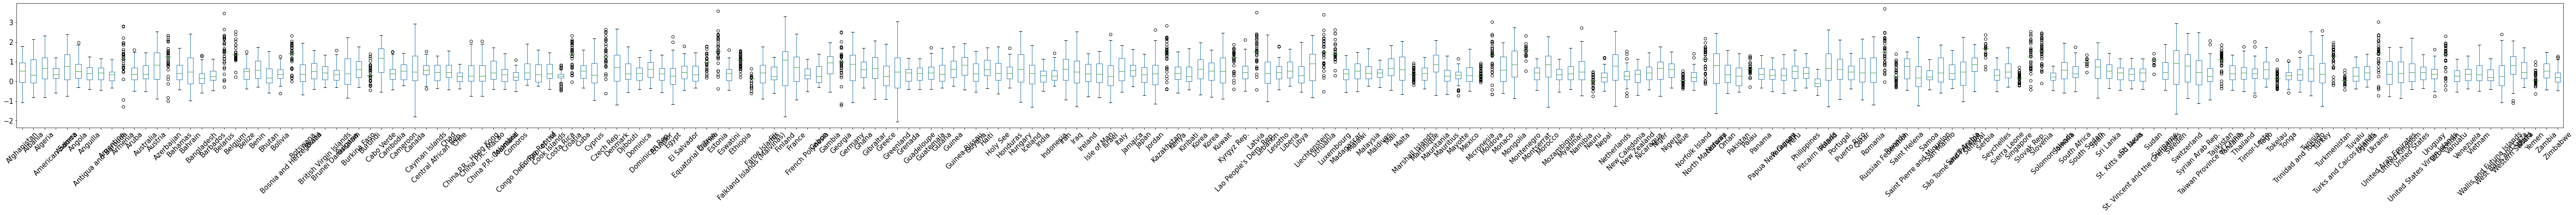

In [25]:
#Boxplot
ndf.boxplot(column=None, figsize=(100, 5),grid=False, rot=45, fontsize=15)

<AxesSubplot:>

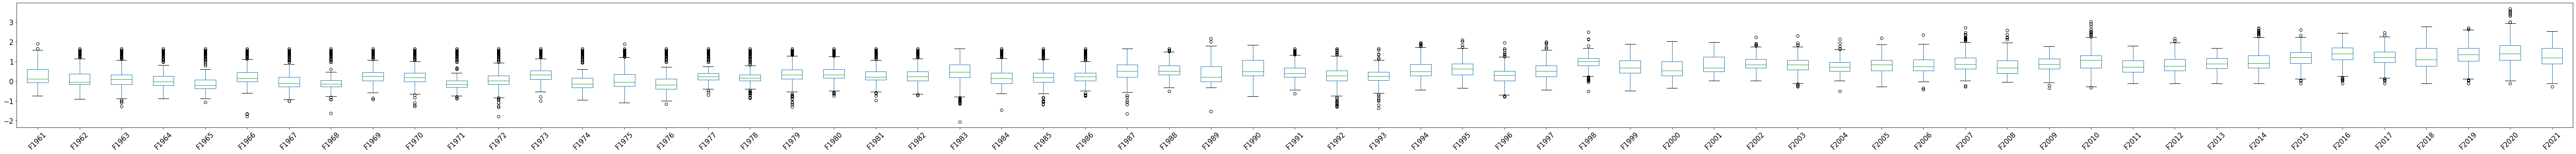

In [26]:
#Boxplot
tdf.boxplot(column=None, figsize=(100, 5),grid=False, rot=45, fontsize=15)

## Density

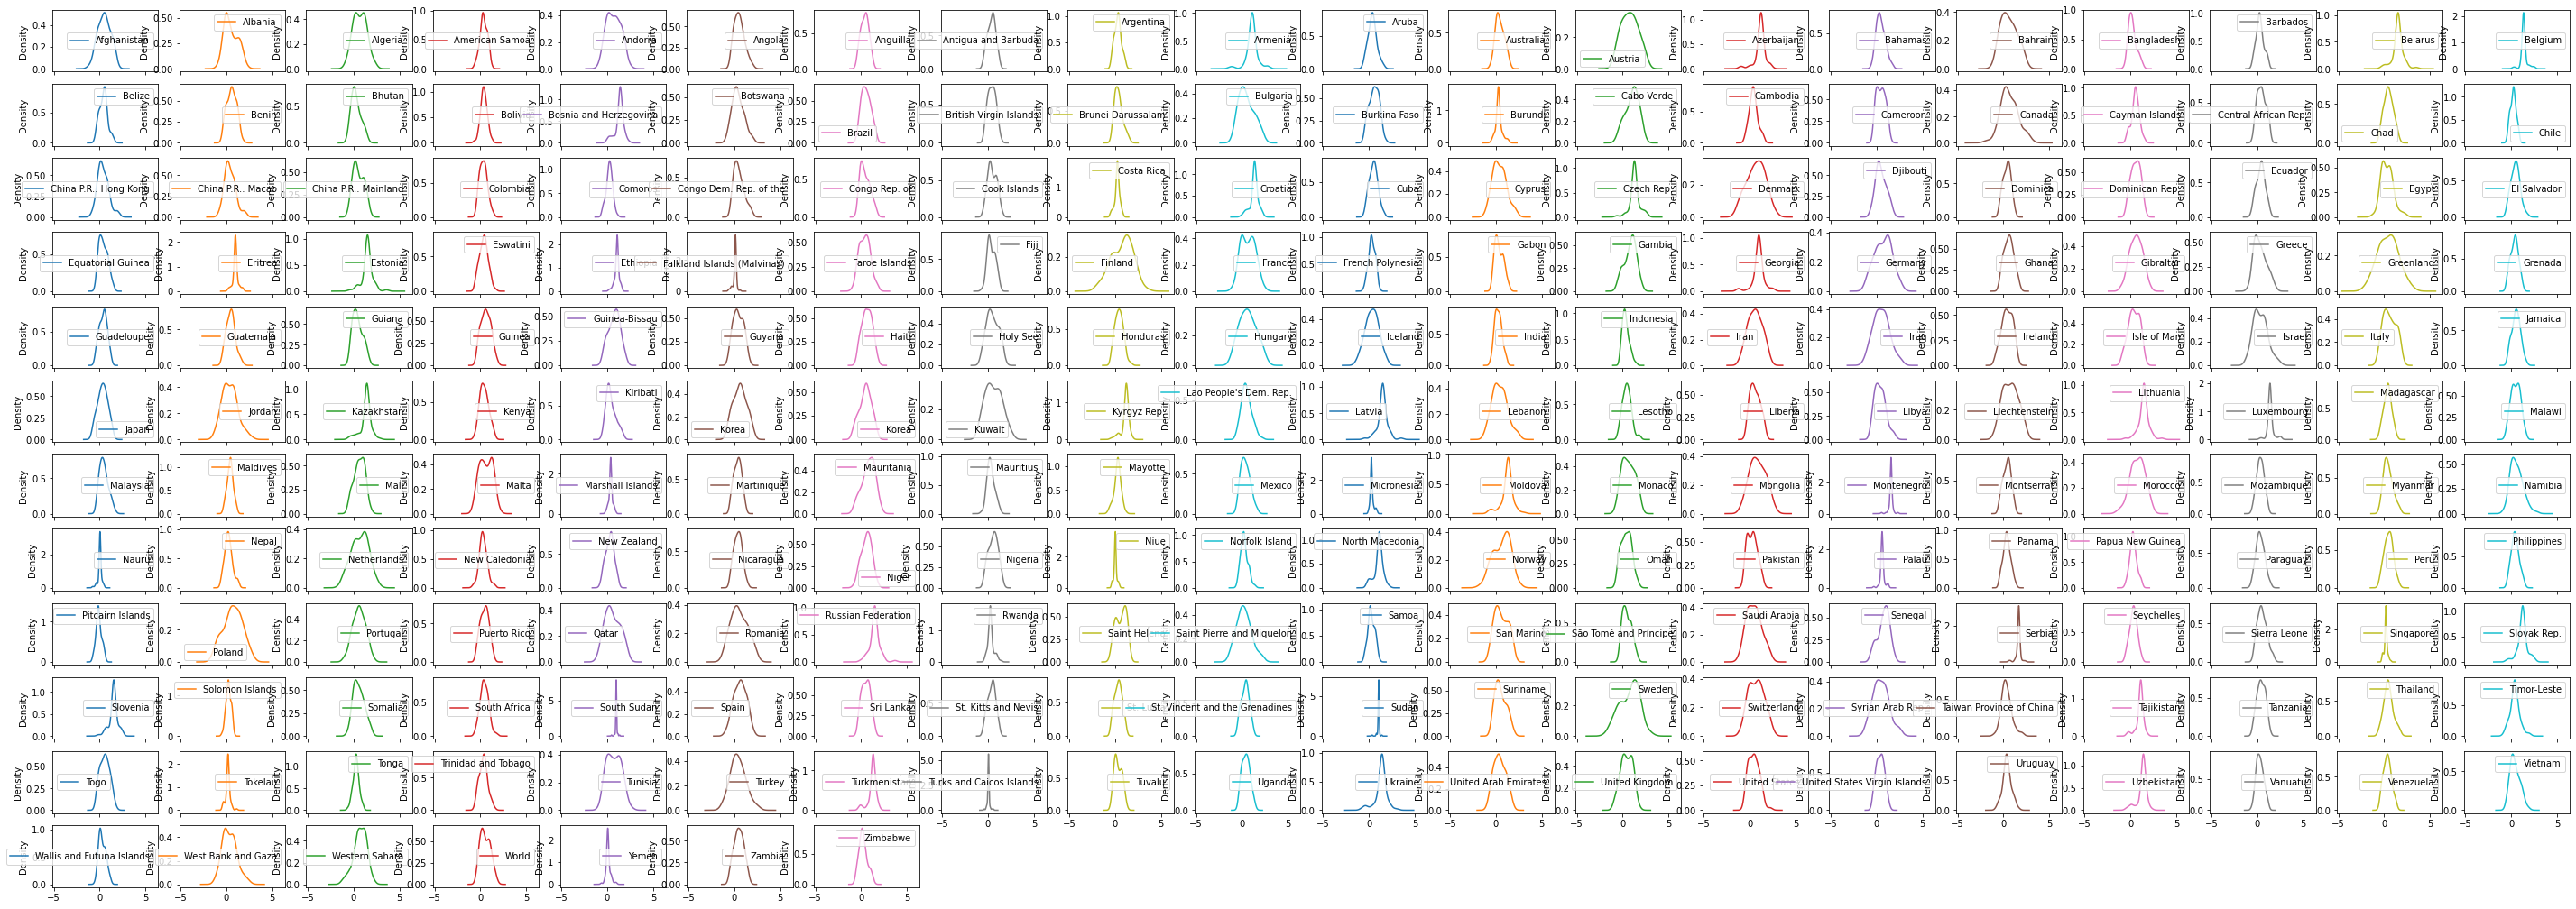

In [27]:
#Density plots for all attributes of a DataFrame
ndf.plot(kind='density', subplots=True, layout=(20,20), figsize=(50, 30));

Text(0.5, 0, 'Countries')

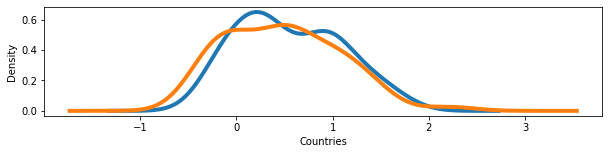

In [28]:
# calling density() to make
# multiple density plot 
ndf.World.plot.density(figsize = (10, 2),
                       linewidth = 4)
ndf['United States'].plot.density(figsize = (10, 2),
                       linewidth = 4)  
plt.xlabel("Countries")


## Line Graph


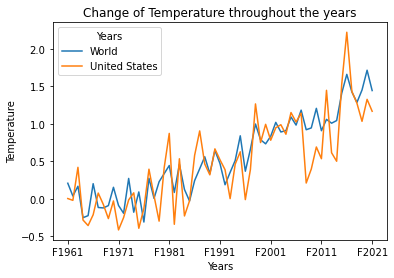

In [29]:
#the line graph for the world and USA to see the Surface Temperature change 
ndf.plot.line(y=['World','United States'])
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.title('Change of Temperature throughout the years')
plt.show()

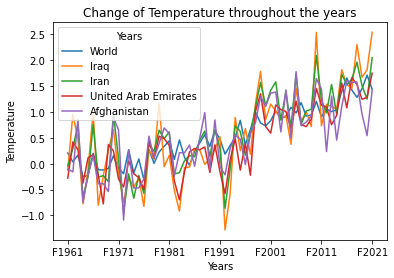

In [30]:
#the line graph for the world and middle countries  to see the Surface Temperature change 
ndf.plot.line(y=['World','Iraq','Iran','United Arab Emirates','Afghanistan'],)
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.title('Change of Temperature throughout the years')
plt.show()

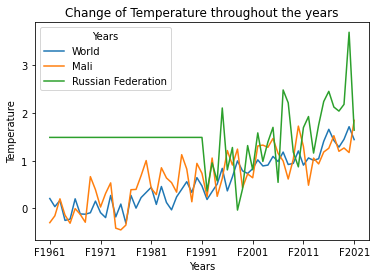

In [31]:
#the line graph for the world, hottest country and the coldest  to see the Surface Temperature change 
ndf.plot.line(y=['World','Mali','Russian Federation'],)
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.title('Change of Temperature throughout the years')
plt.show()

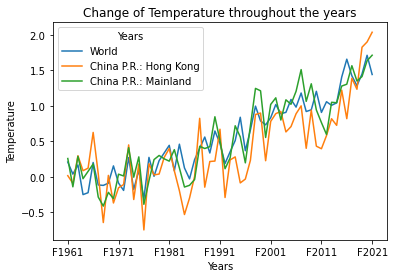

In [32]:
#the line graph for the world, and China  to see the Surface Temperature change 

ndf.plot.line(y=['World','China P.R.: Hong Kong','China P.R.: Mainland'])
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.title('Change of Temperature throughout the years')
plt.show()

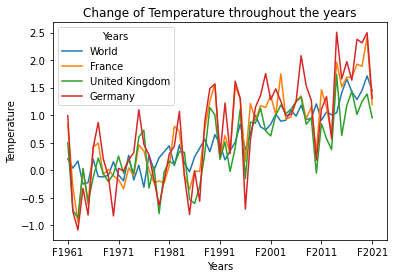

In [33]:
#the line graph for the world,France,United Kingdom,and Germany to see the Surface Temperature change 

ndf.plot.line(y=['World','France','United Kingdom','Germany'])
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.title('Change of Temperature throughout the years')
plt.show()

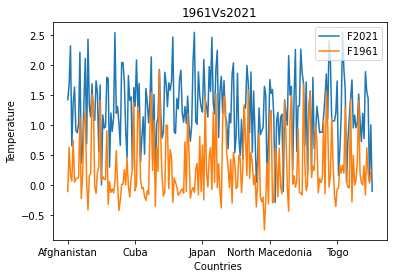

In [34]:
#the line graph for the world and middle countries  to see the Surface Temperature change 
tdf.plot.line(y=['F2021','F1961'],)
plt.xlabel('Countries ')
plt.ylabel('Temperature')
plt.title('1961Vs2021')
plt.show()

In [35]:
ndf

Years,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Vanuatu,Venezuela,Vietnam,Wallis and Futuna Islands,West Bank and Gaza,Western Sahara,World,Yemen,Zambia,Zimbabwe
F1961,-0.105,0.627,0.162,0.066,0.744,0.051,0.104,0.112,0.128,1.1345,...,0.197,0.038,0.002,0.323,-0.165,0.619,0.207,0.033,0.220,0.253
F1962,-0.157,0.330,0.131,-0.055,0.102,-0.145,-0.091,-0.084,-0.030,1.1345,...,0.109,-0.120,-0.248,-0.051,0.731,0.559,0.037,-0.006,-0.177,0.233
F1963,0.852,0.068,0.110,0.160,-0.762,-0.186,0.153,0.185,0.175,1.1345,...,-0.158,-0.014,-0.309,0.125,0.809,0.323,0.167,0.164,-0.397,-0.460
F1964,-0.743,-0.172,0.284,-0.150,0.300,-0.228,0.128,0.109,-0.345,1.1345,...,0.217,0.043,0.080,0.187,-0.654,0.811,-0.252,-0.254,-0.290,-0.101
F1965,-0.211,-0.393,-0.081,-0.582,-0.492,-0.207,-0.364,-0.415,0.091,1.1345,...,-0.549,-0.146,0.007,-0.410,-0.054,-0.342,-0.225,-0.628,-0.421,-0.476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F2017,1.568,1.269,1.498,0.820,1.771,1.064,0.980,0.965,1.100,0.9010,...,1.032,0.752,1.213,0.960,0.821,2.078,1.424,0.061,0.721,0.116
F2018,1.580,2.146,1.211,0.574,1.761,1.504,0.728,0.694,0.876,2.7810,...,0.445,0.808,0.905,0.688,2.093,0.851,1.284,0.061,0.727,0.405
F2019,0.960,1.823,1.094,0.924,1.813,1.975,0.861,0.806,0.756,1.8530,...,0.803,1.171,1.864,1.110,1.298,1.430,1.449,0.061,1.295,0.939
F2020,0.544,1.623,1.913,0.815,2.401,1.387,1.246,1.141,1.109,1.9660,...,1.146,1.293,1.588,1.082,1.553,2.026,1.713,0.061,1.252,0.415


In [36]:
import statsmodels.api as sm


In [41]:
ndf['Year']=ndf.index
ndf

Years,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Vietnam,Wallis and Futuna Islands,West Bank and Gaza,Western Sahara,World,Yemen,Zambia,Zimbabwe,Years,Year
F1961,-0.105,0.627,0.162,0.066,0.744,0.051,0.104,0.112,0.128,1.1345,...,0.002,0.323,-0.165,0.619,0.207,0.033,0.220,0.253,F1961,F1961
F1962,-0.157,0.330,0.131,-0.055,0.102,-0.145,-0.091,-0.084,-0.030,1.1345,...,-0.248,-0.051,0.731,0.559,0.037,-0.006,-0.177,0.233,F1962,F1962
F1963,0.852,0.068,0.110,0.160,-0.762,-0.186,0.153,0.185,0.175,1.1345,...,-0.309,0.125,0.809,0.323,0.167,0.164,-0.397,-0.460,F1963,F1963
F1964,-0.743,-0.172,0.284,-0.150,0.300,-0.228,0.128,0.109,-0.345,1.1345,...,0.080,0.187,-0.654,0.811,-0.252,-0.254,-0.290,-0.101,F1964,F1964
F1965,-0.211,-0.393,-0.081,-0.582,-0.492,-0.207,-0.364,-0.415,0.091,1.1345,...,0.007,-0.410,-0.054,-0.342,-0.225,-0.628,-0.421,-0.476,F1965,F1965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F2017,1.568,1.269,1.498,0.820,1.771,1.064,0.980,0.965,1.100,0.9010,...,1.213,0.960,0.821,2.078,1.424,0.061,0.721,0.116,F2017,F2017
F2018,1.580,2.146,1.211,0.574,1.761,1.504,0.728,0.694,0.876,2.7810,...,0.905,0.688,2.093,0.851,1.284,0.061,0.727,0.405,F2018,F2018
F2019,0.960,1.823,1.094,0.924,1.813,1.975,0.861,0.806,0.756,1.8530,...,1.864,1.110,1.298,1.430,1.449,0.061,1.295,0.939,F2019,F2019
F2020,0.544,1.623,1.913,0.815,2.401,1.387,1.246,1.141,1.109,1.9660,...,1.588,1.082,1.553,2.026,1.713,0.061,1.252,0.415,F2020,F2020


F1961   -0.105
F1962   -0.157
F1963    0.852
F1964   -0.743
F1965   -0.211
         ...  
F2017    1.568
F2018    1.580
F2019    0.960
F2020    0.544
F2021    1.421
Name: Afghanistan, Length: 61, dtype: float64

Years
Afghanistan       float64
Albania           float64
Algeria           float64
American Samoa    float64
Andorra           float64
                   ...   
Yemen             float64
Zambia            float64
Zimbabwe          float64
Years              object
Year               object
Length: 229, dtype: object

F1961    0.207
F1962    0.037
F1963    0.167
F1964   -0.252
F1965   -0.225
         ...  
F2017    1.424
F2018    1.284
F2019    1.449
F2020    1.713
F2021    1.442
Name: Worlds, Length: 61, dtype: object

ValueError: invalid literal for int() with base 10: 'F1961'

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).